In [1]:
import os
import re
import json

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import custom_module as M

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# get master dict and convert to df
_dict = M.gather_dicts()
df = pd.DataFrame.from_dict(_dict)
df

,test1,test2,test3,test4,test5,test6,test7,test8,test9,test10,test11,test12,test13,test14,test15,test16,test17
computer,HP ProBook 450 G5,HP ProBook 450 G5,HP ProBook 450 G5,HP ProBook 450 G5,HP ProBook 450 G5,HP ProBook 450 G5,HP ProBook 450 G5,HP ProBook 4530s,HP ProBook 4530s,HP ProBook 4530s,HP ProBook 450 G5,HP ProBook 4530s,Inspiron 13-5378,Inspiron 13-5378,HP ProBook 4530s,HP ProBook 4530s,Inspiron 13-5378
data,"{'time': ['12:03:59', '12:07:13', '12:11:15', ...","{'time': ['12:46:26', '12:50:20', '12:52:20', ...","{'time': ['13:31:28', '13:35:30', '13:38:15', ...","{'time': ['14:09:46', '14:11:36', '14:16:51', ...","{'time': ['16:26:02', '16:28:46', '16:32:11', ...","{'time': ['18:19:50', '18:24:21', '18:28:50', ...","{'time': ['10:29:54', '10:32:24', '10:33:27', ...","{'time': ['11:06:16', '11:07:59', '11:11:08', ...","{'time': ['13:20:36', '13:25:25', '13:26:01', ...","{'time': ['16:29:26', '16:32:21', '16:34:55', ...","{'time': ['19:10:53', '19:12:59', '19:13:24', ...","{'time': ['10:01:30', '10:03:46', '10:05:48', ...","{'time': ['11:16:49', '11:20:01', '11:20:54', ...","{'time': ['14:32:27', '14:32:51', '14:37:59', ...","{'time': ['14:33:51', '14:38:11', '14:40:45', ...","{'time': ['20:40:05', '20:41:36', '20:46:18', ...","{'time': ['20:38:44', '20:41:07', '20:45:26', ..."
day,2020-06-07,2020-06-07,2020-06-07,2020-06-07,2020-06-08,2020-06-09,2020-06-10,2020-06-10,2020-06-10,2020-06-10,2020-06-10,2020-06-11,2020-06-11,2020-06-11,2020-06-11,2020-06-11,2020-06-11
location,living room,upper east,lower west,upper west,upper east,upper west,upper west,upper west,upper east,upper east,upper west,upper west,upper east,upper east,upper west,upper east,upper west


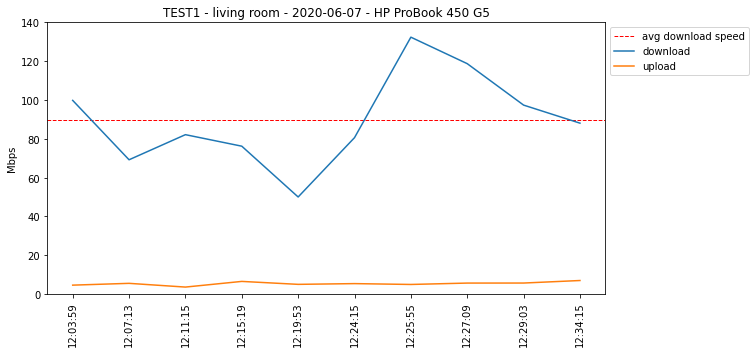

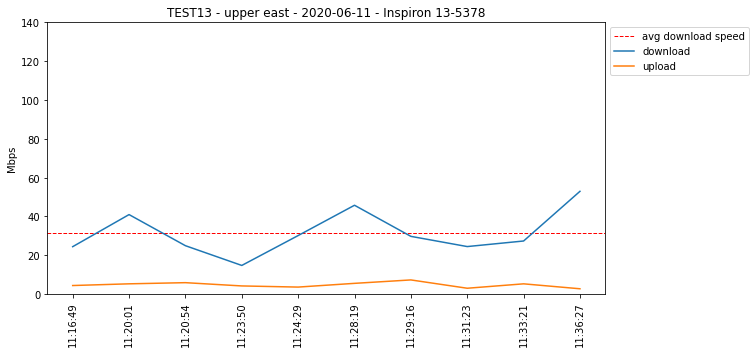

In [3]:
M.plot_single(df, 'test1');
M.plot_single(df, 'test13')

In [4]:
data = M.transform_data(df)
data

,living room,upper east,lower west,upper west,upper east,upper west,upper west,upper west,upper east,upper east,upper west,upper west,upper east,upper east,upper west,upper east,upper west
0,99.751580,41.039935,93.493913,66.902935,32.044196,66.419107,122.409275,24.492825,31.211880,32.814672,68.162876,66.141686,24.402582,26.205842,21.185368,27.358890,46.010426
1,69.165935,47.908396,67.554907,109.046060,14.903680,61.665326,107.105495,29.259755,32.348858,18.641280,70.696012,41.037748,40.931048,21.098576,39.741156,31.470254,50.345134
2,82.097260,41.205536,77.519773,75.464375,41.233320,37.660307,34.099353,46.525715,39.120474,14.031744,102.267763,44.124389,24.906941,30.269488,34.428683,21.980625,33.241564
3,76.162253,49.155870,104.369230,80.596316,22.511722,55.285879,65.111738,37.090685,21.847185,15.798649,75.814819,18.986606,14.735780,21.880183,32.683678,33.016687,50.634500
4,49.996191,70.795400,59.548327,56.638547,24.779011,11.976199,119.922186,66.819126,49.677905,40.156984,88.103700,68.361914,30.129326,21.213800,19.831074,11.809895,18.596342
5,80.555113,25.725200,125.089836,85.813226,27.821760,12.257830,61.931694,32.642292,36.459608,48.074930,106.856534,50.100970,45.736290,29.848186,45.090253,33.968360,54.433133
6,132.313207,50.335698,57.063406,107.269454,15.754265,44.757760,48.782933,70.483728,45.251242,23.157007,35.889676,38.544814,29.716960,33.410585,39.163804,39.251724,42.779460
7,118.668693,33.906345,102.293335,92.528915,39.562590,54.784480,66.499452,43.154635,48.388661,49.213574,55.533975,26.279928,24.457257,31.342952,65.907274,35.641470,52.199049
8,97.323495,61.458700,33.933635,89.636640,42.674279,20.726856,63.223840,75.289383,32.906248,55.514818,63.768312,45.140280,27.324964,28.034869,53.513333,17.682013,29.278794
9,88.024754,48.716588,105.148166,121.669805,44.402936,30.362494,104.535887,24.037394,56.697534,35.752466,35.120300,46.622237,52.914734,19.187630,32.014880,36.062321,37.278490


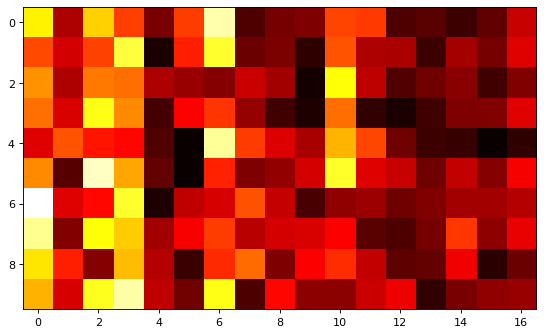

In [5]:
fig=plt.figure(figsize=(10, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(data, cmap='hot', interpolation='nearest')
plt.show()

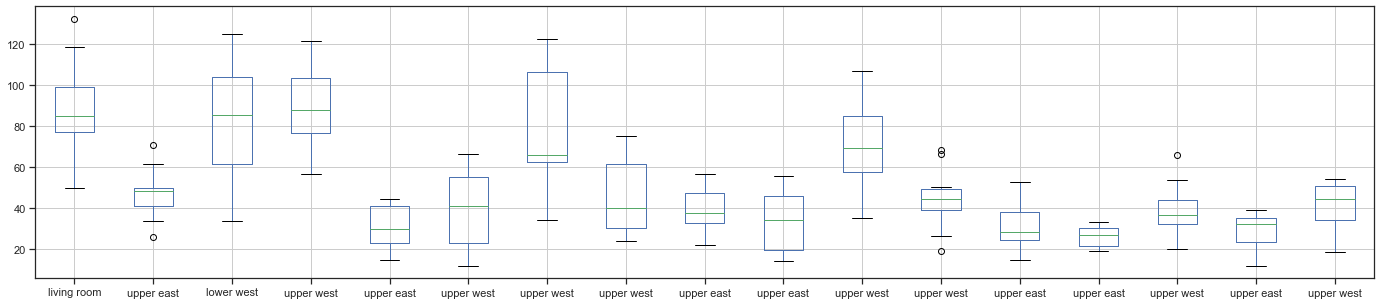

In [6]:
sns.set(style="ticks")
fig, ax = plt.subplots(ncols=1, figsize=(24,5))
data.boxplot();

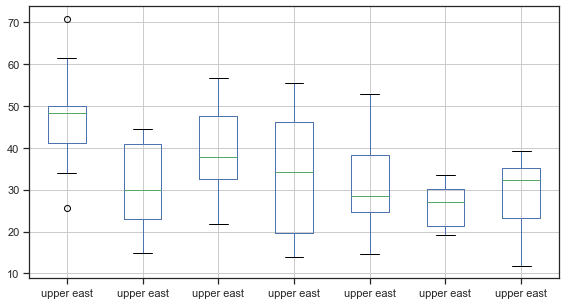

In [7]:
fig, ax = plt.subplots(ncols=1, figsize=(9.5,5))
data['upper east'].boxplot();

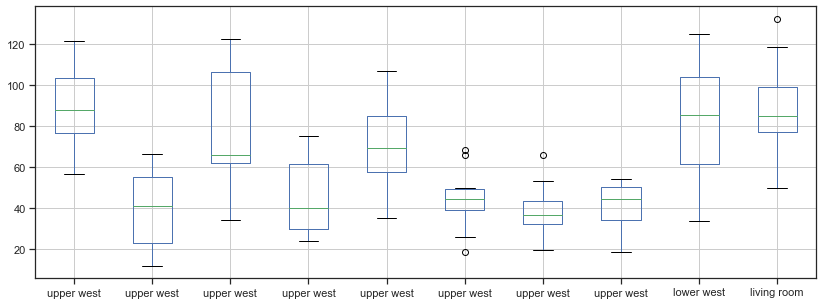

In [8]:
fig, ax = plt.subplots(ncols=1, figsize=(14,5))
data[['upper west','lower west','living room']].boxplot();